In [87]:
# load dependencies
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
from fredapi import Fred
from config import fred_key
fred = Fred(api_key = fred_key)
import numpy as np
from scipy.stats import sem, ttest_ind

In [88]:
# File to Load 
file_unemployment = "Clean_CSV_Folder/Unemployment_Rate_Annually.csv"
file_incomes = "Clean_CSV_Folder/Median_Income_Annually.csv"
file_delinquency = "Clean_CSV_Folder/Delinquent_Loan_Rates_Annually.csv"

# Read Files and store into separate Pandas data frames
unemployment_df = pd.read_csv(file_unemployment)
incomes_df = pd.read_csv(file_incomes)
delinquency_df = pd.read_csv(file_delinquency)

In [89]:
del_inc_df = pd.merge(incomes_df, delinquency_df[['Date','ALL']], on='Date')
del_inc_df

,Date,Median_Income,ALL
0,2003,59286.0%,2.5%
1,2004,59080.0%,2.2%
2,2005,59712.0%,2.0%
3,2006,60178.0%,2.0%
4,2007,60985.0%,3.1%
5,2008,58811.0%,5.6%
6,2009,58400.0%,7.7%
7,2010,56873.0%,6.6%
8,2011,56006.0%,4.9%
9,2012,55900.0%,4.3%


In [90]:
# Hypothesis_1: Median Income is not a statistically significant variable that impacts consumer delinquency rates

In [91]:
corr_inc_del = del_inc_df['Median_Income'].corr(del_inc_df['ALL'])
corr_inc_del

-0.542891130184709

In [134]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(del_inc_df['Median_Income'], del_inc_df['ALL'])

In [135]:
print('Correlation:', round(corr_inc_del,2))
print("r-squared: ", round((r_value**2),2))
print("slope: ", round(slope,2))
print("intercept: ", round(intercept,2))
print("p-value: ", p_value)
print("standard error: ", round(std_err,2))
if p_value < 0.05:
    print("Reject the null hypothesis_1 and conclude that Median Income has significant explanatory power regarding changes in consumer delinquency rates.")
else:
    print("Accept the null hypothesis_1. Median Income is not statistically significant in explaining moves in consumer delinquency rates.")

Correlation: -0.54
r-squared:  0.29
slope:  -0.0
intercept:  29.27
p-value:  0.029776483963571437
standard error:  0.0
Reject the null hypothesis_1 and conclude that Median Income has significant explanatory power regarding changes in consumer delinquency rates.


In [94]:
r_value.dtype

dtype('float64')

In [95]:
del_unemp_df = pd.merge(unemployment_df, delinquency_df[['Date','ALL']], on='Date')
del_unemp_df

,Date,Unemployment_Rate,ALL
0,2003,6.0%,2.5%
1,2004,5.5%,2.2%
2,2005,5.1%,2.0%
3,2006,4.6%,2.0%
4,2007,4.6%,3.1%
5,2008,5.8%,5.6%
6,2009,9.3%,7.7%
7,2010,9.6%,6.6%
8,2011,8.9%,4.9%
9,2012,8.1%,4.3%


In [96]:
# Hypothesis_2: Unemployment Rate is not a statistically significant variable that impacts consumer delinquency rates

In [97]:
corr_unem_del = del_unemp_df['Unemployment_Rate'].corr(del_unemp_df['ALL'])
corr_unem_del

0.8283839226349666

In [132]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(del_unemp_df['Unemployment_Rate'], del_unemp_df['ALL'])

In [133]:
print('Correlation:', round(corr_unem_del,2))
print("r-squared: ", round((r_value**2),2))
print("slope: ", round(slope,2))
print("intercept: ", round(intercept,2))
print("p-value: ", p_value)
print("standard error: ", round(std_err,2))
if p_value < 0.05:
    print("Reject the null hypothesis_2 and conclude that the Unemployment Rate has significant explanatory power regarding changes in consumer delinquency rates.")
else:
    print("Accept the null hypothesis_2. The Unemployment Rate is not a statistically significant variable in explaining moves in consumer delinquency rates.")

Correlation: 0.83
r-squared:  0.69
slope:  0.76
intercept:  -1.11
p-value:  4.000014757898775e-05
standard error:  0.13
Reject the null hypothesis_2 and conclude that the Unemployment Rate has significant explanatory power regarding changes in consumer delinquency rates.


In [100]:
delinquency_df

,Date,AUTO,CREDIT_CARD,MORTGAGE,HELOC,STUDENT_LOAN,OTHER,ALL
0,2003,2.1%,8.2%,1.5%,0.7%,5.7%,4.9%,2.5%
1,2004,1.8%,7.3%,1.3%,0.4%,5.7%,5.0%,2.2%
2,2005,1.7%,6.3%,1.3%,0.4%,6.9%,4.2%,2.0%
3,2006,1.9%,5.6%,1.4%,0.6%,7.3%,3.9%,2.0%
4,2007,2.4%,6.5%,2.7%,1.3%,7.9%,4.1%,3.1%
5,2008,3.0%,7.9%,5.7%,3.2%,7.5%,5.9%,5.6%
6,2009,3.4%,10.3%,8.1%,4.8%,7.6%,7.8%,7.7%
7,2010,2.7%,10.2%,6.7%,3.5%,8.5%,7.0%,6.6%
8,2011,1.8%,6.8%,4.8%,2.9%,8.8%,5.3%,4.9%
9,2012,1.6%,5.0%,4.0%,2.4%,10.0%,4.1%,4.3%


In [101]:
# Hypothesis_3: Mortgage delinquency rates are not a statistically significant variable in explaining total consumer delinquency rates

In [119]:
corr_mortg_del_total_del = delinquency_df['MORTGAGE'].corr(delinquency_df['ALL'])
corr_mortg_del_total_del

0.9946876153524535

In [130]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(delinquency_df['MORTGAGE'], delinquency_df['ALL'])

In [131]:
print('Correlation:', round(corr_mortg_del_total_del,2))
print("r-squared: ", round((r_value**2),2))
print("slope: ", round(slope,2))
print("intercept: ", round(intercept,2))
print("p-value: ", p_value)
print("standard error: ", std_err)
if p_value < 0.05:
    print("Reject the null hypothesis_3 and conclude that the Delinquency Rates on Mortgage loans have significant explanatory power regarding changes in total consumer delinquency rates.")
else:
    print("Accept the null hypothesis_3. Delinquency Rates on Mortgage loans are not a statistically significant variable in explaining moves in total consumer delinquency rates.")

Correlation: 0.99
r-squared:  0.99
slope:  0.79
intercept:  1.22
p-value:  3.1436530843267496e-16
standard error:  0.020997781405777596
Reject the null hypothesis_3 and conclude that the Delinquency Rates on Mortgage loans have significant explanatory power regarding changes in total consumer delinquency rates.


In [105]:
# Household Debt Service Payments as a Percent of Disposable Personal Income
debt_income_perc = fred.get_series('TDSP')
pd.options.display.float_format = '{0:.1f}%'.format
debt_income_perc

1980-01-01   10.6%
1980-04-01   10.6%
1980-07-01   10.4%
1980-10-01   10.3%
1981-01-01   10.3%
              ... 
2018-07-01    9.7%
2018-10-01    9.7%
2019-01-01    9.7%
2019-04-01    9.7%
2019-07-01    9.7%
Length: 159, dtype: float64

In [106]:
debt_income_perc_df = pd.DataFrame(debt_income_perc).reset_index()
debt_income_perc_df.columns = ['Date', 'Debt_Service_Pmts_to_Disp_Income']
debt_income_perc_df

,Date,Debt_Service_Pmts_to_Disp_Income
0,1980-01-01,10.6%
1,1980-04-01,10.6%
2,1980-07-01,10.4%
3,1980-10-01,10.3%
4,1981-01-01,10.3%
...,...,...
154,2018-07-01,9.7%
155,2018-10-01,9.7%
156,2019-01-01,9.7%
157,2019-04-01,9.7%


In [107]:
debt_income_perc_df.dtypes

Date                                datetime64[ns]
Debt_Service_Pmts_to_Disp_Income           float64
dtype: object

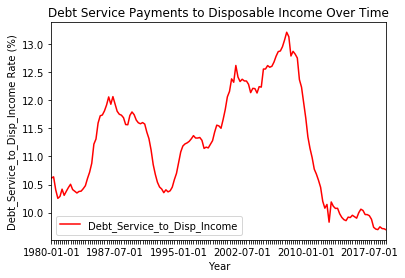

In [108]:
# CREATE CHART!!!
# ax = plt.subplot(111)
fig, ax = plt.subplots()

# Set the x axis
x_axis = debt_income_perc_df['Date']
y_axis = debt_income_perc_df['Debt_Service_Pmts_to_Disp_Income']

# Set the plot title and axes titles
plt.title("Debt Service Payments to Disposable Income Over Time")
plt.xlabel("Year")
plt.ylabel("Debt_Service_to_Disp_Income Rate (%)")

ax.plot(x_axis, y_axis, color="red", label="Debt_Service_to_Disp_Income")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 30) != 0:
        t.set_visible(False)
# ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

# save the figure
# plt.savefig("Figures/Debt_Service_Pmts_to_Disp_Income.png")
plt.savefig("Debt_Service_Pmts_to_Disp_Income.png")

# Show the resulting scatter plot
plt.show()

In [109]:
debt_income_perc_df_annually = debt_income_perc_df.groupby(debt_income_perc_df.Date.dt.year).mean()
pd.options.display.float_format = '{0:.1f}%'.format
debt_income_perc_df_annually

,Debt_Service_Pmts_to_Disp_Income
Date,
1980,10.5%
1981,10.3%
1982,10.4%
1983,10.4%
1984,10.7%
1985,11.5%
1986,11.9%
1987,11.9%
1988,11.7%


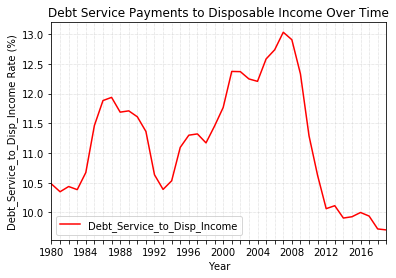

In [110]:
# CREATE CHART!!!
fig, ax = plt.subplots()

# Set the x axis
x_axis = debt_income_perc_df_annually.index
y_axis = debt_income_perc_df_annually['Debt_Service_Pmts_to_Disp_Income']

# Set the plot title and axes titles
plt.title("Debt Service Payments to Disposable Income Over Time")
plt.xlabel("Year")
plt.ylabel("Debt_Service_to_Disp_Income Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
# ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
# ax.plot(x_axis, inf_survrate, color="red", label="Infubinol")
# ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril")
ax.plot(x_axis, y_axis, color="red", label="Debt_Service_to_Disp_Income")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 4) != 0:
        t.set_visible(False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

# save the figure
# plt.savefig("Figures/Debt_Service_Pmts_to_Disp_Income_Annually.png")
plt.savefig("Debt_Service_Pmts_to_Disp_Income_Annually.png")

# Show the resulting scatter plot
plt.show()

In [111]:
debt_income_perc_df.to_csv("debt_to_income.csv")
debt_income_perc_df_annually.to_csv("Clean_CSV_Folder/Debt_to_Income_Annually.csv")

In [112]:
del_debtinc_df = pd.merge(debt_income_perc_df_annually, delinquency_df[['Date','ALL']], on='Date')
del_debtinc_df

,Date,Debt_Service_Pmts_to_Disp_Income,ALL
0,2003,12.2%,2.5%
1,2004,12.2%,2.2%
2,2005,12.6%,2.0%
3,2006,12.7%,2.0%
4,2007,13.0%,3.1%
5,2008,12.9%,5.6%
6,2009,12.3%,7.7%
7,2010,11.3%,6.6%
8,2011,10.6%,4.9%
9,2012,10.1%,4.3%


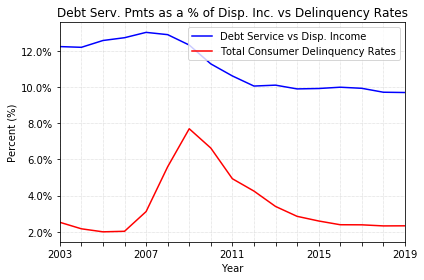

In [137]:
# CREATE CHART!!!
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots()

# Set the x axis
x_axis = del_debtinc_df['Date']

# Set the plot title and axes titles
plt.title("Debt Serv. Pmts as a % of Disp. Inc. vs Delinquency Rates")
plt.xlabel("Year")
plt.ylabel("Percent (%)")

# Plot the 'mean' list vs. the established x axis with error
ax1.plot(x_axis, del_debtinc_df['Debt_Service_Pmts_to_Disp_Income'], color="blue", label="Debt Service vs Disp. Income")
ax1.plot(x_axis, del_debtinc_df['ALL'], color="red", label="Total Consumer Delinquency Rates")

# Add the legend and gridlines
ax1.legend(loc=1)

tick_locations = [value for value in x_axis]
ax1.set_xticks(tick_locations, minor=False)
for i, t in enumerate(ax1.get_xticklabels()):
    if (i % 4) != 0:
        t.set_visible(False)
ax1.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(min(x_axis), max(x_axis))

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('$%1.0f'))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# save the figure
# plt.savefig("Figures/Combined_Data.png")
plt.savefig("Debt_to_Income_vs_Delinquency.png")

# Show the resulting scatter plot
plt.show()

In [114]:
# Hypothesis_4: Debt Service vs Median Income rates are not a statistically significant variable in explaining total consumer delinquency rates

In [115]:
corr_del_debtinc_df = del_debtinc_df['Debt_Service_Pmts_to_Disp_Income'].corr(del_debtinc_df['ALL'])
corr_del_debtinc_df

0.21496688961585814

In [116]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(del_debtinc_df['Debt_Service_Pmts_to_Disp_Income'], del_debtinc_df['ALL'])

In [118]:
print('Correlation:', round(corr_del_debtinc_df,2))
print("r-squared: ", round((r_value**2),2))
print("slope: ", round(slope,2))
print("intercept: ", round(intercept,2))
print("p-value: ", round(p_value,2))
print("standard error: ", round(std_err,2))
if p_value < 0.05:
    print("Reject the null hypothesis_4 and conclude that the rate of Debt Service Payments to Median Disposable Household Income has significant explanatory power regarding changes in total consumer delinquency rates.")
else:
    print("Accept the null hypothesis_4. Debt Service Payments to Median Disposable Household Income is not a statistically significant variable in explaining moves in total consumer delinquency rates.")

Correlation: 0.21
r-squared:  0.05
slope:  0.29
intercept:  0.31
p-value:  0.41
standard error:  0.33
Accept the null hypothesis_4. Debt Service Payments to Median Disposable Household Income is not a statistically significant variable in explaining moves in total consumer delinquency rates.
